In [1]:
# FACILITIES VER CHECKING # Python: 2.7.11
import numpy as np        # 1.11.0
import scipy as sp        # 0.17.0
import matplotlib         # 1.5.1
import pandas as pd       # 0.18.0
import sklearn            # 0.17.1

# COMPUTATIONAL FACILITIES

## A. THEANO
* A Python library for fast numerical computation that can be run on the CPU or GPU.

In [2]:
# import theano.sandbox.cuda
# theano.sandbox.cuda.use("gpu0")
# import os    
# os.environ['THEANO_FLAGS'] = "device=gpu1"
import theano
from theano import tensor
a = tensor.dscalar()
b = tensor.dscalar()
    # symbolic floating-point scalars.
c = a + b
    # simple symbolic expression.
f = theano.function([a,b], c)
    # a callable objects that takes (a, b) and computes c.
result = f(1.5, 2.5)
print result

4.0


## B. TENSORFLOW
* A Python library for fast numerical computing created and released by Google.

In [3]:
import tensorflow as tf
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
    # symbolic floating-point scalars.
add = tf.add(a,b) 
    # symbolic expression using add function.
sess = tf.Session()
binding = {a: 1.5, b: 2.5}
c = sess.run(add, feed_dict=binding)
print c

4.0


## C. KERAS
* A Python library with a range of deep learning models (wrapped on top of Theano and TensorFlow).

In [4]:
# PROCEDURE
#  1. Define model: create Sequential model and add configured layers.
#  2. Compile model: specify loss function and optimizers and call compile().
#  3. Fit model: train on sample of same by calling fit().
#  4. Make predictions: generate predictions on new data by calling evaluate() or predict().

## D. GPU CLOUD COMPUTING

In [5]:
# $49/MONTH, START WHEN NECESSARY.

# MULTI-LAYERED PERCEPTRON

## FIRST PASS: PIMA DIABETE DATASET

In [6]:
# PIMA DIABETE DATASET
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
#  parameters:
#   - number of times pregnant.
#   - plasma glucose.
#   - diastolic blood pressure.
#   - triceps skin fold thickness.
#   - 2hr serun insulin.
#   - body mass index.
#   - diabetes pedigree function.
#   - age.
#   + class (onset of diabetes within 5 years).

In [7]:
import numpy as np
from IPython.display import Image

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using Theano backend.


In [9]:
# LOAD DATA
seed = 7
np.random.seed(7)
dataset = np.loadtxt(path, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
print X.shape, Y.shape

(768, 8) (768,)


In [10]:
# DEFINE MODEL
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu')) # 1st hidden, 12 neurons, 8 inputs.
model.add(Dense(8, init='uniform', activation='relu')) # 2nd hidden, 8 neurons.
model.add(Dense(1, init='uniform', activation='sigmoid')) # output layer, 1 neuron, 1 output.
    # Dense: fully-connected layer.

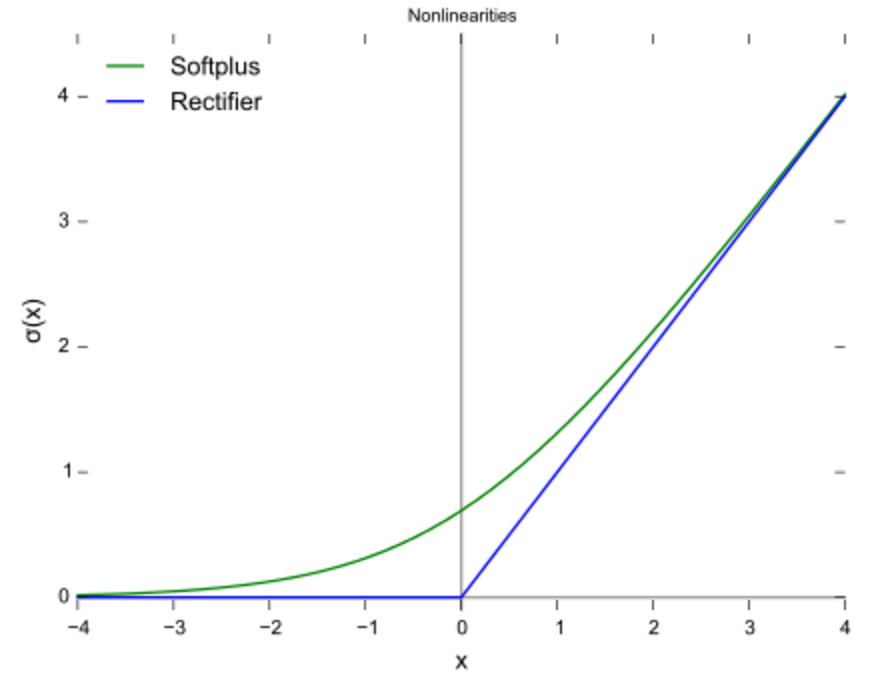

In [11]:
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/relu.png', 
      width="30%")

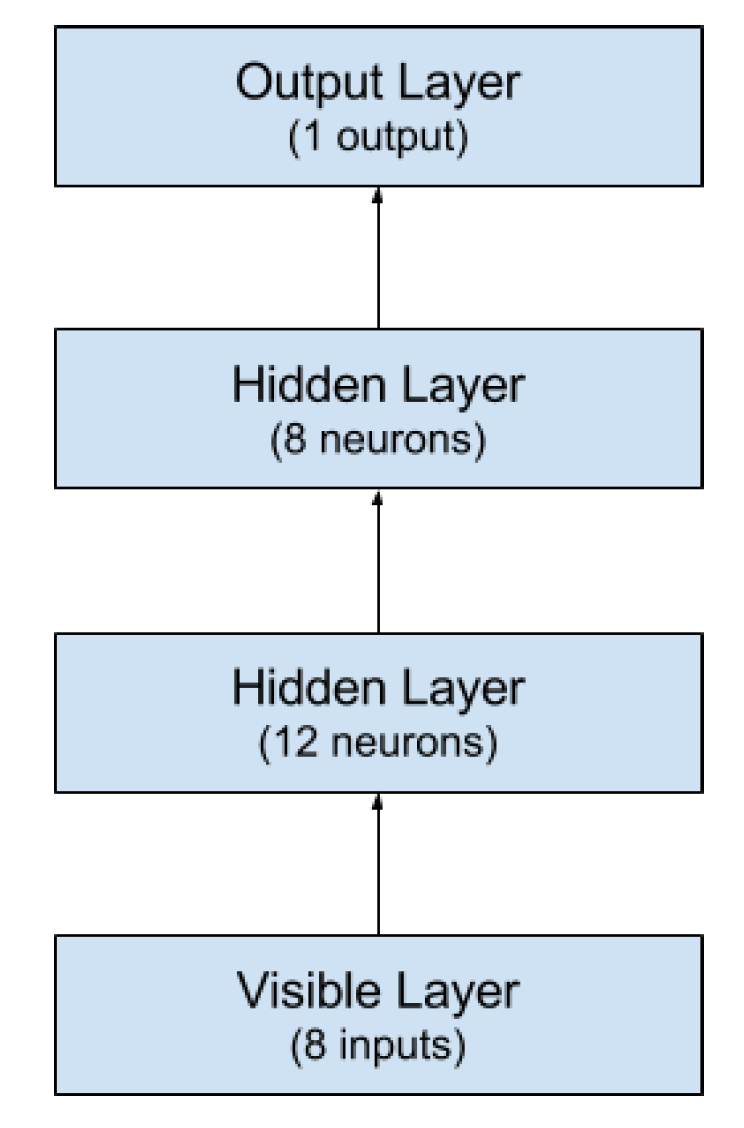

In [12]:
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/simple_mlp_architecture.png', 
      width="15%")

In [13]:
# COMPILE MODEL
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

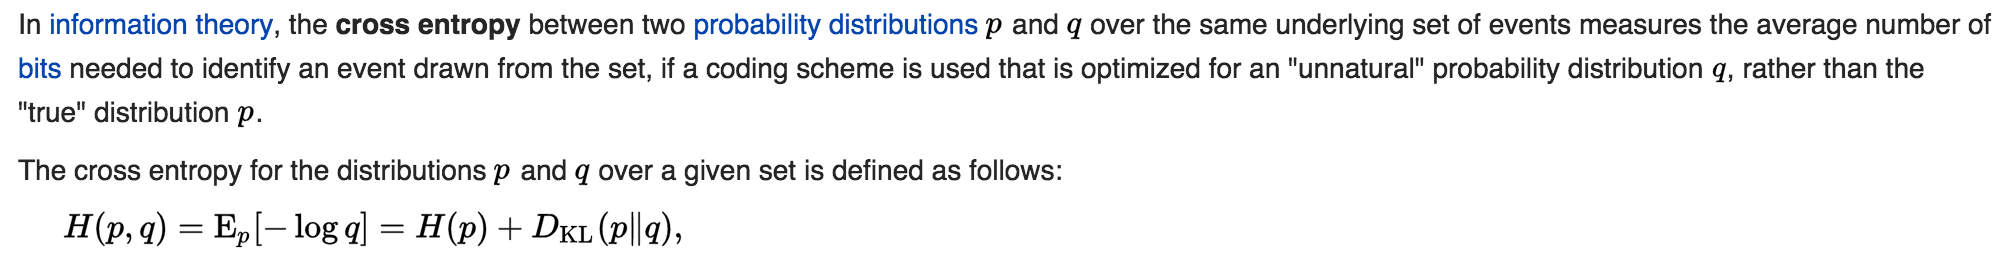

In [14]:
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/cross_entropy.png', 
      width="80%")

In [15]:
%%time
# FIT MODEL
model.fit(X, Y, nb_epoch=50, batch_size=10)
    # nb_epoch: number of iterations.
    # batch_size: number of instances evaluated before weight update.

Epoch 1/50
768/768 [==============================] - 0s - loss: 0.6826 - acc: 0.6328     
Epoch 2/50
768/768 [==============================] - 0s - loss: 0.6590 - acc: 0.6510     
Epoch 3/50
768/768 [==============================] - 0s - loss: 0.6475 - acc: 0.6549     
Epoch 4/50
768/768 [==============================] - 0s - loss: 0.6416 - acc: 0.6615     
Epoch 5/50
768/768 [==============================] - 0s - loss: 0.6216 - acc: 0.6745     
Epoch 6/50
768/768 [==============================] - 0s - loss: 0.6128 - acc: 0.6680     
Epoch 7/50
768/768 [==============================] - 0s - loss: 0.6018 - acc: 0.6927     
Epoch 8/50
768/768 [==============================] - 0s - loss: 0.5962 - acc: 0.6927     
Epoch 9/50
768/768 [==============================] - 0s - loss: 0.5991 - acc: 0.6953     
Epoch 10/50
768/768 [==============================] - 0s - loss: 0.5920 - acc: 0.6927     
Epoch 11/50
768/768 [==============================] - 0s - loss: 0.5905 - acc: 0.6979   

In [16]:
# EVALUATION
scores = model.evaluate(X, Y)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

768/768 [==============================] - 0s     
acc: 73.96%


In [18]:
''' TIE IT ALL TOGETHER
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
seed = 7
np.random.seed(7)
dataset = np.loadtxt(path, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu')) # 1st hidden, 12 neurons, 8 inputs.
model.add(Dense(8, init='uniform', activation='relu')) # 2nd hidden, 8 neurons.
model.add(Dense(1, init='uniform', activation='sigmoid')) # output layer, 1 neuron, 1 output.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, nb_epoch=50, batch_size=10)
scores = model.evaluate(X, Y)
print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)
'''
print 'DONE'

DONE
